In [ ]:
## Display word frequency plot of the technology skills required across all job vacancies

In [21]:
# Setup
import json, nltk, pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

# Taxonomy of technologies
technologies = ['JavaScript', 'HTML', 'HTML5', 'CSS', 'CSS3', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash', 'Shell', 'PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Ruby', 'Go', 'Assembly', 'Swift', 'Kotlin', 'R', 'VBA', 'Objective-C', 'Scala', 'Rust', 'Dart', 'Elixir', 'Clojure', 'WebAssembly', 'jQuery', 'React.js', 'React', 'Angular', 'Angular.js', 'ASP.NET', 'ASP', 'Express', 'Spring', 'Vue.js', 'Vue', 'Django', 'Flask', 'Laravel', 'Ruby on Rails', 'Drupal', 'Linux', 'Windows', 'Docker', 'Android', 'AWS', 'MacOS', 'Slack', 'Raspberry Pi', 'WordPress', 'iOS', 'Google Cloud Platform', 'GCS', 'Azure', 'Arduino', 'Heroku', 'Kubernetes', 'IBM Cloud', 'Watson', 'MySQL', 'PostreSQL', 'SQL Server', 'SQLite', 'MongoDB', 'Redis', 'MariaDB', 'Oracle', 'Elasticsearch', 'Firebase', 'DynamoDB', 'Cassandra', 'Couchbase', 'Node.js', 'Node', '.NET', '.NET Core', 'Pandas', 'Unity 3D', 'React Native', 'TensorFlow', 'Ansible', 'Cordova', 'Xamarin', 'Apache Spark', 'Hadoop', 'Unreal Engine', 'Flutter', 'Torch/PyTorch', 'Puppet', 'Chef', 'CryEngine']

# Make lowercase
technologies = [ technology.lower() for technology in technologies ]

In [29]:
# Import job vacancy .json file to list of job vacancies called 'data'
with open ('20200419_developer_Bristol_0.json') as json_file:
    data = json.load(json_file)
    data = data['content']

# Normalize / tokenize
for jobad in data:
    # Make title and description lowercase
    jobad['description'] = jobad['description'].lower()

    # Tokenize
    jobad['description'] = nltk.word_tokenize(jobad['description'])

    # Remove non-skill words in 'description' field
    jobad['description_tech'] = []
    for technology in technologies:
        for word in jobad['description']:
            if word == technology:
                jobad['description_tech'].append(technology)

    # jobad['description'] = [technology for technology in technologies if technology in jobad['description']]

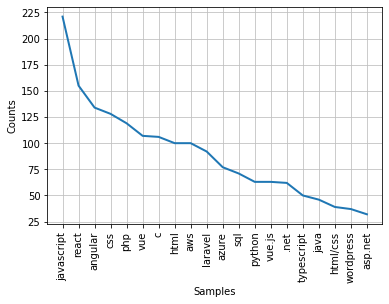

In [32]:
# Create single text of all 'description' fields
text1 = [" ".join(jobad['description_tech']) for jobad in data]
text1 = " ".join(text1)
text1 = nltk.word_tokenize(text1)
text1 = nltk.Text(text1)

# Analyze frequency dist of text1
fd = nltk.FreqDist(text1)
fd.plot(20, cumulative=False)

In [34]:
# Create single text of all 'description' fields, disregarding words that do not appear in technologies taxonomy
text1 = [" ".join(jobad['description']) for jobad in data]
text1 = " ".join(text1)

# Analyze frequency dist of text1
text1 = nltk.word_tokenize(text1)
text1 = [w for w in text1 if w in technologies['languages'] or w in technologies['frameworks'] or w in technologies['platforms'] or w in technologies['databases'] or w in technologies['other']]
fd = nltk.FreqDist(text1)
fd.plot(20, cumulative=False)

TypeError: list indices must be integers or slices, not str

In [25]:
# Create co-occurence matrix (https://www.pingshiuanchua.com/blog/post/keyword-network-analysis-with-python-and-gephi)
articles = data
headline = [article['title'] for article in articles]
description = [str(article['description']) for article in articles]

all_text = headline + description

cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english')
X = cv.fit_transform(all_text)

Xc = (X.T * X)
Xc.setdiag(0)

names = cv.get_feature_names()
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df.to_csv('to_gephi.csv', sep = ',')

In [26]:
df

,00,000,0001,00018206,03job,04,05,06,10,100,...,yearexperience,yearlocation,years,yearsnot,yearsyou,yes,yesterdaywe,youearn,youyou,zero
00,0,840,24,24,0,0,10,0,10,142,...,171,10,522,0,4,52,28,10,16,0
000,840,0,0,0,0,1,10,1,10,221,...,246,10,679,0,6,77,56,10,16,0
0001,24,0,0,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00018206,24,0,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03job,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yes,52,77,0,0,0,9,0,9,0,49,...,28,0,28,0,0,0,0,0,0,0
yesterdaywe,28,56,0,0,0,0,0,0,0,28,...,28,0,112,0,0,0,0,0,0,0
youearn,10,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youyou,16,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
